# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

In [4]:
!pip install matplotlib numpy pandas scipy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 20.8 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 42.7 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 52.7 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 47.7 MB/s  0:00:006m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 55.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 50.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [matplotlib]4 [matplotlib]n]


## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [8]:
# YOUR CODE HERE
wine_data = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t", compression="gzip")
print(wine_data.head()) # test to make sure loaded correctly
wine_data = wine_data.dropna()
wine_data.sample(10)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  target  
0      9.4       5  
1      9.8       5  
2      9.8       5  
3 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
105,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5
1493,7.7,0.540,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5
234,8.2,1.000,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6
986,9.8,0.340,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1142,6.9,0.450,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.4,6
714,9.9,0.740,0.28,2.6,0.078,21.0,77.0,0.99800,3.28,0.51,9.8,5
1482,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.3,4
308,10.3,0.430,0.44,2.4,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6
1080,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [ ]:
# YOUR CODE HERE
# C1: fixed acidity	is a continuous, feature, numeric variable of this dataset that describes the amount of non-volatile acids in a wine, those stable at room temperature. 
# C2: volatile acidity	is a continuous, feature, numeric variable of this dataset that describes the amount of volatile, or gaseous acids in a wine. These tend to be vinegary.
# C3: citric acid	is a continuous, feature, numeric variable of this dataset that describes the amount of citric acid in the wine.
# C4: residual sugar	is a continuous, feature, numeric variable of this dataset that describes the amount of sugar left over form the graps after fermentation. This is a good measure of how sweet the wine will be.
# C5: chlorides	is a continuous, feature, numeric variable of this dataset that describes the amount of salt like compounds are within the wine. Important for balance.
# C6: density	is a continuous, feature, numeric variable of this dataset that describes the mass per unit volule of wine. This is affected by the other characteristics of the wine.
# C7: pH	is a continuous, feature, numeric variable of this dataset that describes the acidity of the wine on the pH scale, low numbers indicate more acidity.
# C8: sulphates	is a continuous, feature, numeric variable of this dataset that describes the level of sulphates, which help with the shelf life of the wine.
# C9: alcohol	is a continuous, feature, numeric variable of this dataset that describes the percentage of alcohol by volume of the wine. 
# C10: target is an integer variable describing the quality of the wine based on the feature variables discussed above.

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
target                  1.000000
Name: target, dtype: float64

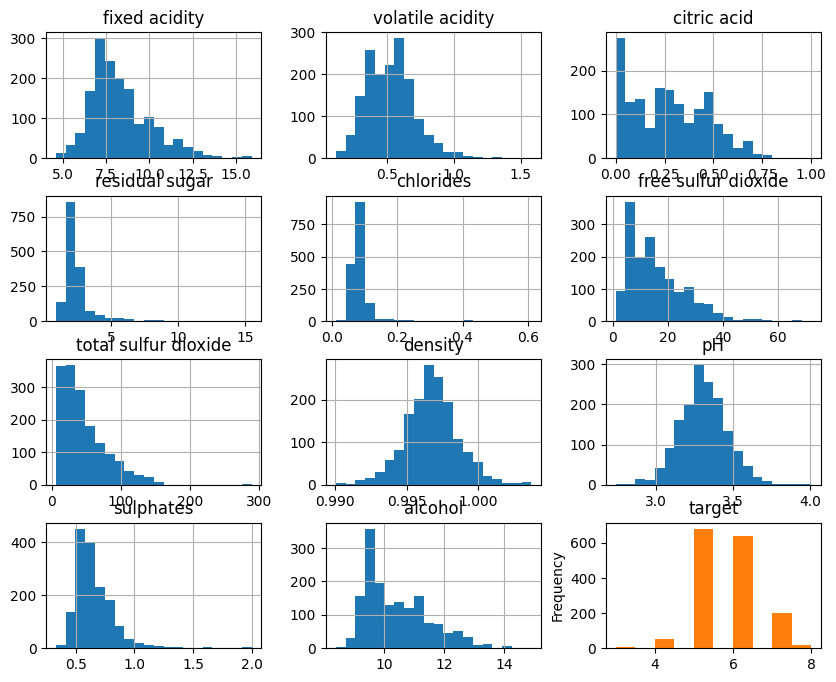

In [ ]:
# YOUR CODE HERE
# print(wine_data.head())
# print(wine_data.info())
# print(wine_data.describe())
wine_data.hist(figsize=(10, 8), bins=20)


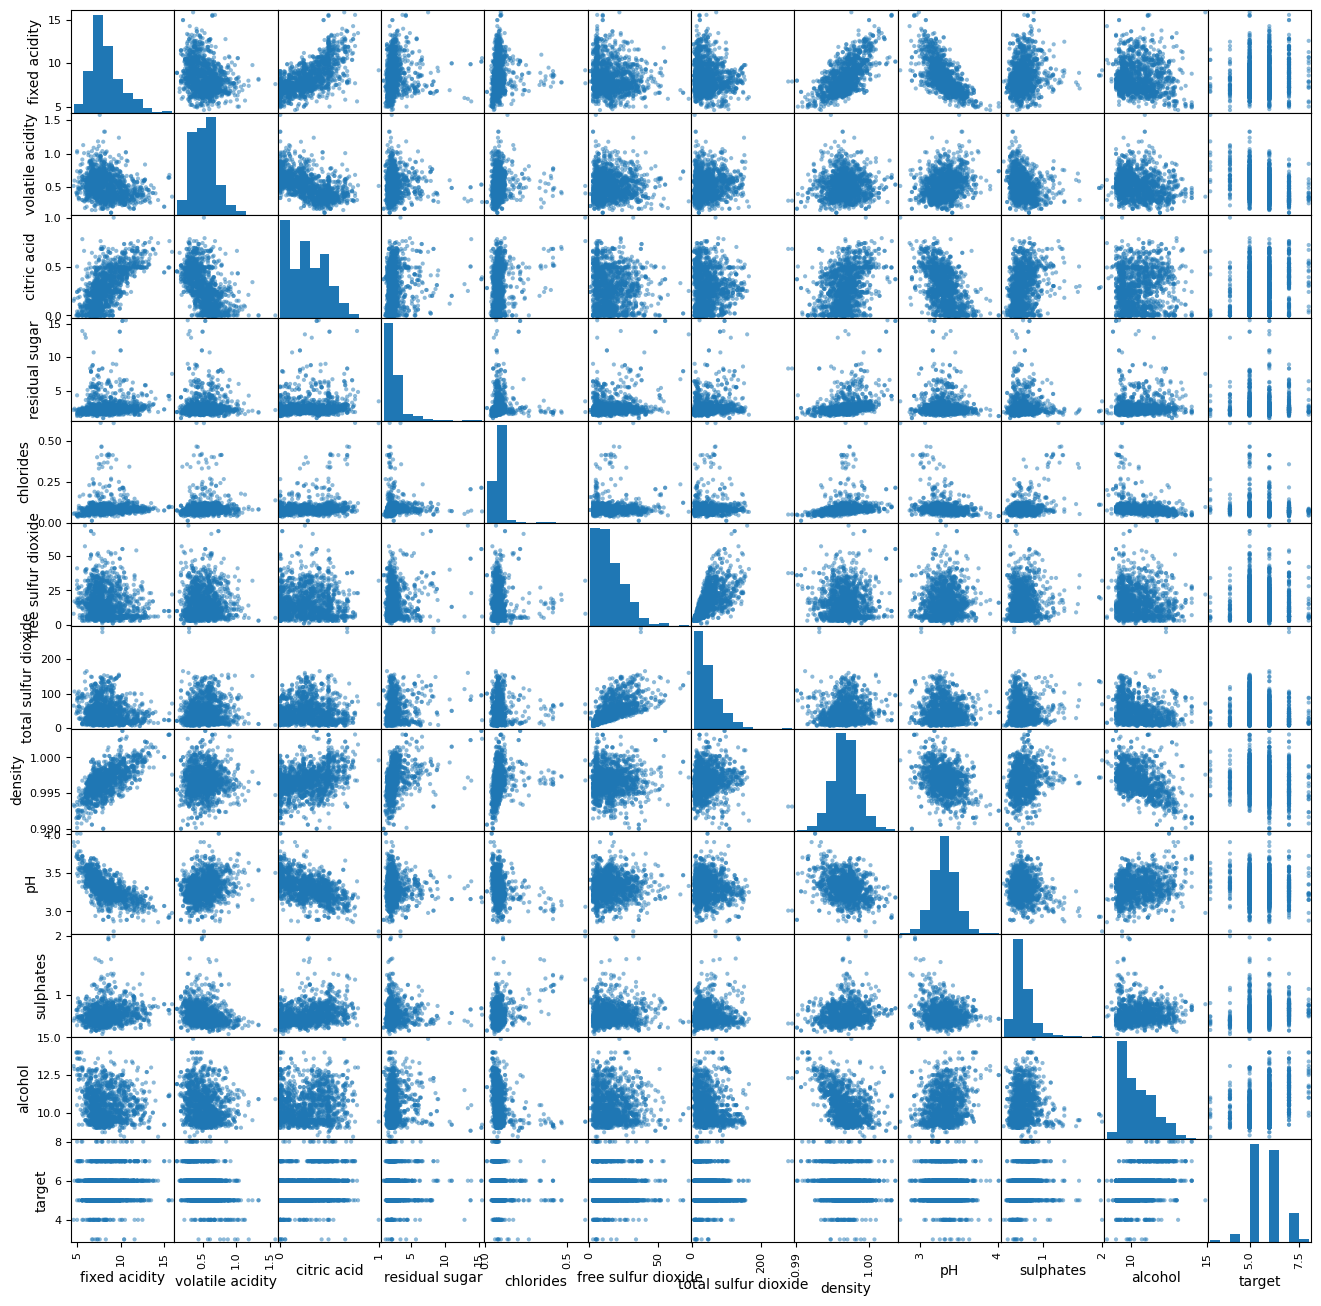

In [27]:
_ = pd.plotting.scatter_matrix(wine_data, figsize=(16,16))

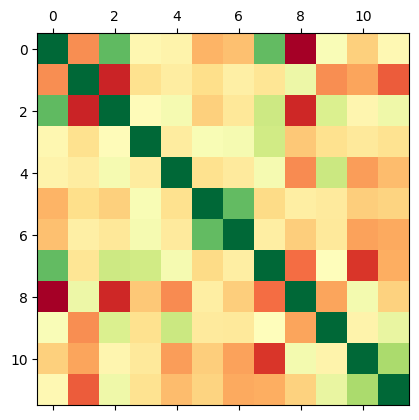

In [21]:
_ = plt.matshow(wine_data.corr(), cmap="RdYlGn")

Text(0, 0.5, 'chlorides')

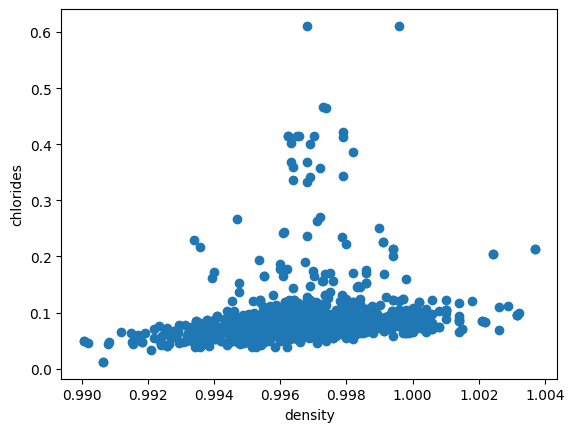

In [ ]:
plt.scatter(wine_data["density"], wine_data["chlorides"])
plt.xlabel("density")
plt.ylabel("chlorides")
# This chart is particularly interesting to me as it is the only slightly positive correlated feature with density as shown in the heat map and visually with higher density showing just a bit of an uptilt in chlorides.

Text(0, 0.5, 'alcohol')

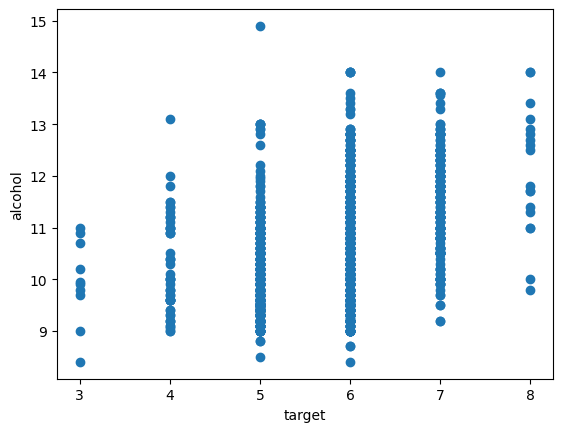

In [ ]:
plt.scatter(wine_data["target"], wine_data["alcohol"])
plt.xlabel("target")
plt.ylabel("alcohol")
# This chart was noteworthy as it is the most strongly correlated feature (alcohol) with the target variable. Higher alcohol % tends to be more highly rated. 

Text(0, 0.5, 'volatile acidity')

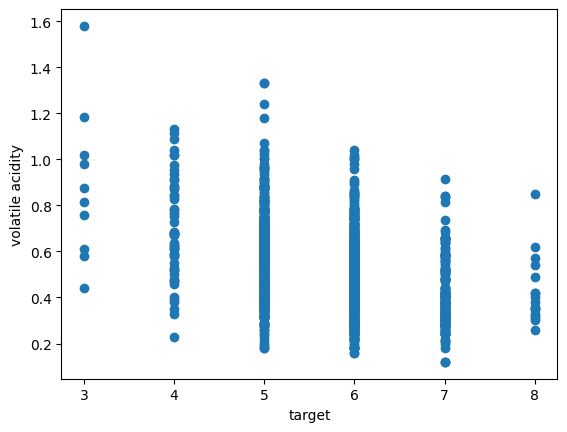

In [ ]:
plt.scatter(wine_data["target"], wine_data["volatile acidity"])
plt.xlabel("target")
plt.ylabel("volatile acidity")
# This chart is noteworthy as this feature column of volatile acidity is the most negatively correlated with the target variable. It's most interesting because other columns determining acidity do not correlate as much as this one. pH and fixed acidity do not negatively impact the target as much as this one.

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

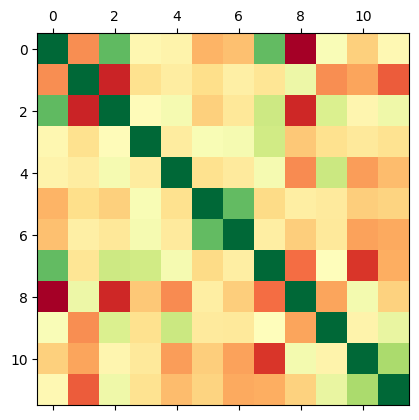

In [ ]:
# YOUR CODE HERE
_ = plt.matshow(wine_data.corr(numeric_only=True), cmap="RdYlGn")
#The pair marked as most correlated is pH and fixed acidity. The most positively correlated pair arre free and total sulphur dioxide. 

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE
#1. Linear model "https://scikit-learn.org/stable/modules/linear_model.html"; "https://www.geeksforgeeks.org/machine-learning/ml-linear-regression/"
#2. Support Vector Machines "https://scikit-learn.org/stable/modules/svm.html"; "https://en.wikipedia.org/wiki/Support_vector_machine"
#3. Decision Trees "https://scikit-learn.org/stable/modules/tree.html"; "https://www.ibm.com/think/topics/decision-trees"


YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

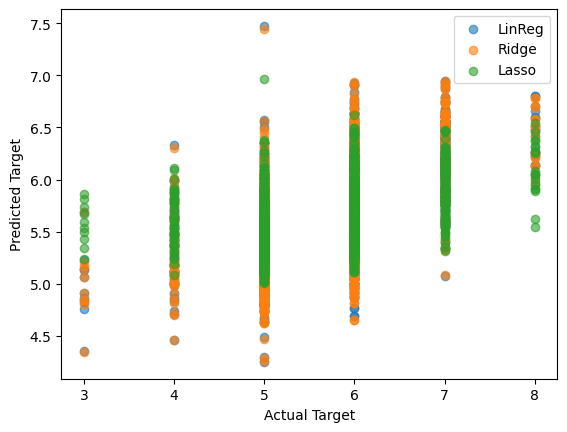

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
X1 = wine_data.drop(columns='target')
y1 = wine_data['target']
model1 = LinearRegression()
model1.fit(X1, y1)
y1_pred = model1.predict(X1)

model2 = sklearn.linear_model.Ridge(alpha=.5)
model2.fit(X1,y1)
y2_pred = model2.predict(X1)

model3 = sklearn.linear_model.Lasso(alpha=0.1)
model3.fit(X1,y1)
y3_pred = model3.predict(X1)

plt.scatter(y1,y1_pred, alpha=0.6, label="LinReg")
plt.scatter(y1,y2_pred, alpha=0.6, label="Ridge")
plt.scatter(y1,y3_pred, alpha=0.6, label="Lasso")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.legend()




In [ ]:
#Model1 (LinReg) L1 and L2 loss functions:
M1L1 = np.mean(np.abs(y1 - y1_pred))
M1L2 = np.mean((y1 - y1_pred)** 2)
#Model2 (Ridge) L1 and L2 loss functions:
M2L1 = np.mean(np.abs(y1 - y2_pred))
M2L2 = np.mean((y1 - y2_pred)** 2)
#Model3 (Lasso)L1 and L2 loss functions:
M3L1 = np.mean(np.abs(y1 - y3_pred))
M3L2 = np.mean((y1 - y3_pred)** 2)
print(f'Model 1 L1 loss is {M1L1} and L2 loss is {M1L2}.')
print(f'Model 2 L1 loss is {M2L1} and L2 loss is {M2L2}.')
print(f'Model 3 L1 loss is {M3L1} and L2 loss is {M3L2}.')

Model 1 L1 loss is 0.5004899635644883 and L2 loss is 0.41676716722140794.
Model 2 L1 loss is 0.5010059325850194 and L2 loss is 0.41712146684658596.
Model 3 L1 loss is 0.5561757897408898 and L2 loss is 0.4957470811620322.


YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [66]:
# YOUR CODE HERE
from sklearn.model_selection import KFold

X = wine_data.drop(columns='target')
y = wine_data['target']

def L2_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {"Linear": LinearRegression(), "Ridge": sklearn.linear_model.Ridge(alpha=0.5), "Lasso": sklearn.linear_model.Lasso(alpha=0.1)}

cv_L2_losses = {}

for name, model in models.items():
    fold_losses = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        fold_losses.append(L2_loss(y_test, y_pred))

    cv_L2_losses[name] = np.mean(fold_losses)

train_L2_losses = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    train_L2_losses[name] = L2_loss(y, y_pred)

In [ ]:
for name in models.keys():
    print(f"{name} Regression")
    print(f"  L2 loss (Cross-Validation): {cv_L2_losses[name]:.4f}")
    print(f"  L2 loss (Full Training):   {train_L2_losses[name]:.4f}\n")



Linear Regression
  L2 loss (Cross-Validation): 0.4288
  L2 loss (Full Training):   0.4168

Ridge Regression
  L2 loss (Cross-Validation): 0.4284
  L2 loss (Full Training):   0.4171

Lasso Regression
  L2 loss (Cross-Validation): 0.5000
  L2 loss (Full Training):   0.4957



YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [74]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso

pipelines = {
                "Linear": Pipeline([("scaler", StandardScaler()),("model", LinearRegression())]),
                "Ridge": Pipeline([("scaler", StandardScaler()),("model", Ridge(alpha=0.5))]),
                "Lasso": Pipeline([("scaler", StandardScaler()),("model", Lasso(alpha=0.1))])}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_L2 = {}

for name, pipe in pipelines.items():
    fold_losses = []
    
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        
        fold_losses.append(l2_loss(y_test, y_pred))
    
    cv_L2[name] = np.mean(fold_losses)

train_L2 = {}

for name, pipe in pipelines.items():
    pipe.fit(X, y)
    y_pred = pipe.predict(X)
    train_L2[name] = l2_loss(y, y_pred)

In [75]:
for name in pipelines.keys():
    print(f"{name} Regression")
    print(f"  L2 loss (CV):    {cv_L2[name]:.4f}")
    print(f"  L2 loss (Train): {train_L2[name]:.4f}\n")

Linear Regression
  L2 loss (CV):    0.4288
  L2 loss (Train): 0.4168

Ridge Regression
  L2 loss (CV):    0.4287
  L2 loss (Train): 0.4168

Lasso Regression
  L2 loss (CV):    0.4579
  L2 loss (Train): 0.4548



In [ ]:
#L2 loss for Linear regression is slightly increased from P6's loss of 0.4168 compared to this model's 0.4288
#L2 loss for Ridge regression 0.4171 in P6 is also slightly increased to this model's 0.4287
#L2 Loss is much less for the Lasso regression. In P6 the L2 Loss was .4957 and this one is .4579. This model has the lasrgets difference after preprocessing the data. 

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE
#That probably will find some improvement, but cross validation itself should provide improvement and is less time consuming. 

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE
# I would pick the Linear Reression model from P6. It has the lowest L2 Loss value (just barely compared to the one from P8) of all of them and cross generalisation did not improve it, but was very close.
# The Ridge model was a close second to the linear regression model with just barely higher L2 Loss values than linreg. Although the Ridge regression did slightly outpoerform LinReg when cross validated. 
#LinReg is the simplest model of the chosen types and it just barely outperformed the Ridge Regression so that was chosen. 
#The lasso model proved to be the worst of the built models with consistently higher L2 Losses both normal and cross validated. 

YOUR ANSWERS HERE